<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Econo_lstm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
from glob2 import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')
#dataset = pd.read_json(file_list[0],typ='series')

In [5]:
# Get the stock quote
df = pd.DataFrame(dataset['data'])
# Show teh data
df

,open,high,low,close,volume,start_Time
0,6.63,6.72,6.50,6.59,43406.0,2003-09-05 00:00:00
1,6.75,6.81,6.57,6.62,37381.0,2003-09-08 00:00:00
2,6.75,6.87,6.47,6.59,41136.0,2003-09-09 00:00:00
3,6.53,6.68,6.50,6.58,36487.0,2003-09-10 00:00:00
4,6.56,6.75,6.47,6.53,38052.0,2003-09-11 00:00:00
...,...,...,...,...,...,...
4898,2440.00,2558.80,2386.65,2537.45,8434009.0,2023-05-25 00:00:00
4899,2565.00,2599.95,2535.15,2544.35,3963515.0,2023-05-26 00:00:00
4900,2570.00,2583.50,2523.00,2534.05,2779432.0,2023-05-29 00:00:00
4901,2529.30,2554.15,2475.15,2496.45,1736953.0,2023-05-30 00:00:00


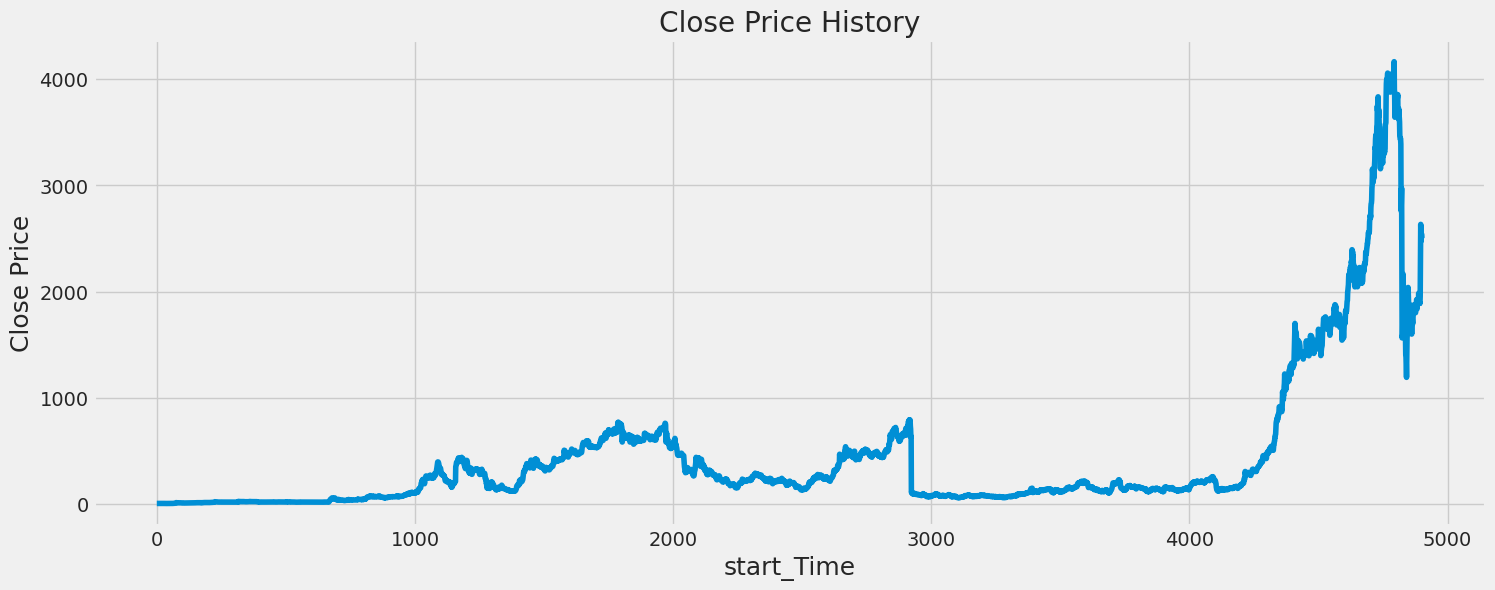

In [6]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('start_Time', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:

data = df.filter(['close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4658

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.27427126e-04],
       [1.34639982e-04],
       [1.27427126e-04],
       ...,
       [6.07800944e-01],
       [5.98760831e-01],
       [5.98015503e-01]])

In [9]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.27427126e-04, 1.34639982e-04, 1.27427126e-04, 1.25022841e-04,
       1.13001414e-04, 1.22618555e-04, 8.41499889e-05, 5.77028496e-05,
       6.01071350e-05, 1.20214270e-05, 1.20214270e-05, 4.56814226e-05,
       2.64471394e-05, 4.08728518e-05, 1.20214270e-05, 2.16385686e-05,
       1.68299978e-05, 1.20214270e-05, 1.20214270e-05, 2.40428540e-05,
       1.63491407e-04, 1.25022841e-04, 1.20214270e-04, 1.32235697e-04,
       1.68299978e-04, 2.54854252e-04, 2.09172830e-04, 1.37044268e-04,
       1.27427126e-04, 1.27427126e-04, 9.13628451e-05, 5.28942788e-05,
       3.60642810e-05, 3.84685664e-05, 1.68299978e-05, 4.56814226e-05,
       2.88514248e-05, 7.21285619e-06, 1.44257124e-05, 1.68299978e-05,
       0.00000000e+00, 3.36599956e-05, 9.61714159e-06, 3.36599956e-05,
       5.77028496e-05, 9.61714159e-05, 1.53874265e-04, 1.99555688e-04,
       1.80321405e-04, 9.85757013e-05, 8.65542743e-05, 8.41499889e-05,
       1.44257124e-04, 1.15405699e-04, 1.05788558e-04, 7.69371327e-05,
     

#LSTM Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4598/4598 [==============================] - 185s 39ms/step - loss: 3.2347e-04


In [11]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 40ms/step


260.77399120544135

<ipython-input-15-c624982ab269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


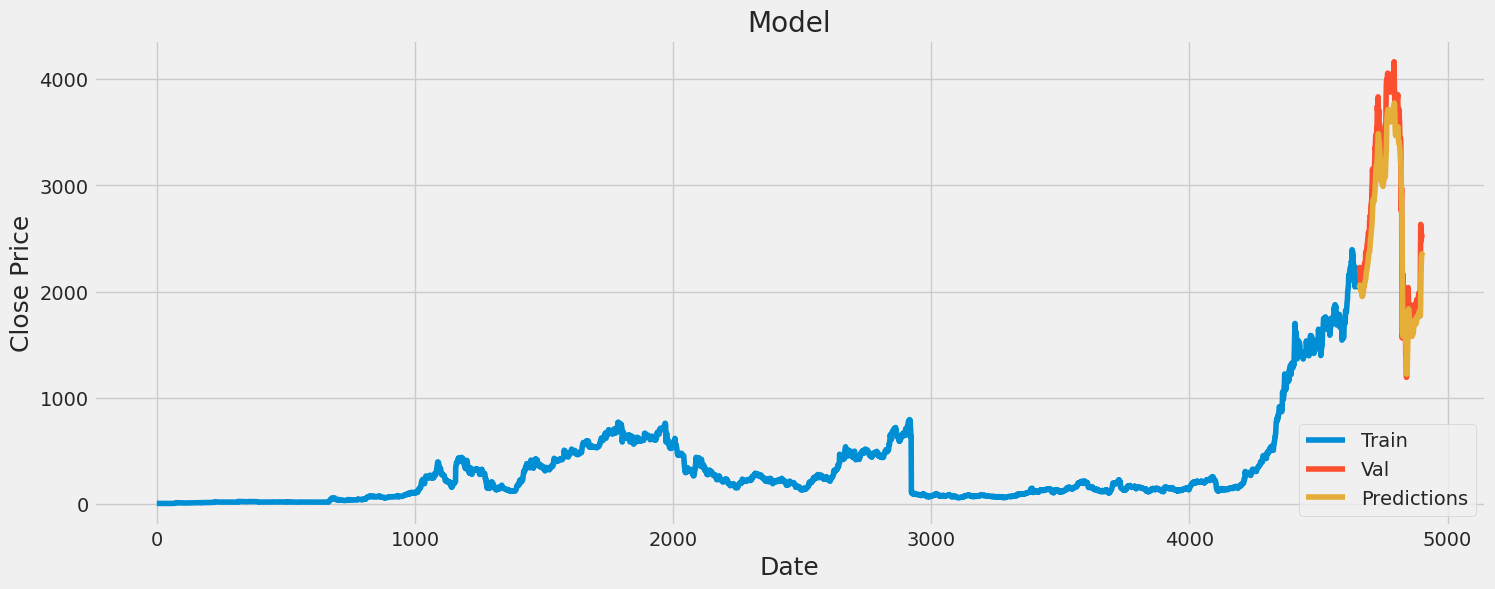

In [15]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,close,Predictions
4658,2225.05,2035.393066
4659,2227.55,2051.333252
4660,2177.20,2063.033691
4661,2219.20,2052.331299
4662,2203.10,2054.825439
...,...,...
4898,2537.45,2257.118652
4899,2544.35,2319.210205
4900,2534.05,2349.000977
4901,2496.45,2355.952393
